C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

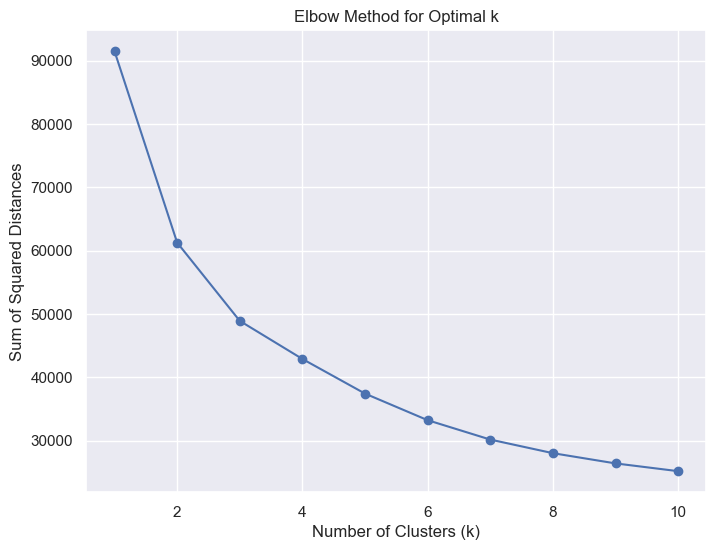

In [3]:
# importing the libraries
import warnings  
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load the dataset
dataset = pd.read_csv("dataset.csv")

# Data Transformation
datatypes = ['float64']
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dataset.select_dtypes(include=datatypes))

# Elbow Method to find the optimal number of clusters
inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(normalized_data)
    inertia_values.append(kmeans.inertia_)

sns.set()

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

# Choose the optimal k based on the elbow method (visual inspection)



In [6]:
from sklearn.metrics import silhouette_score

# Applying KMeans clustering with the chosen number of clusters
optimal_k = 6  # Update this with the chosen optimal value from the elbow method

kmeans = KMeans(n_clusters=optimal_k)
dataset['cluster'] = kmeans.fit_predict(normalized_data)


# Calculate Silhouette Score
silhouette_avg = silhouette_score(normalized_data, dataset['cluster'])
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

# Recommendation System based on KMeans clusters
class MusicRecommendationSystem:
    
    def __init__(self, dataset):
        self.dataset = dataset

    def recommend(self, song_name, amount=1):
        song_cluster = self.dataset[self.dataset['name'].str.lower() == song_name.lower()]['cluster'].values[0]
        cluster_songs = self.dataset[self.dataset['cluster'] == song_cluster]
        cluster_songs = cluster_songs[cluster_songs['name'].str.lower() != song_name.lower()]
        recommendations = cluster_songs.sort_values('popularity', ascending=False).head(amount)
        columns = ['artists', 'name', 'popularity']
        return recommendations[columns]

# Creating an instance of the recommendation system
recommendation_system = MusicRecommendationSystem(dataset)

# Example usage of the recommendation system
recommendation_system.recommend("Lovers Rock", 10)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 6 clusters: 0.2884793140156933


,artists,name,popularity
19866,['Ariana Grande'],positions,96
19862,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95
19976,['KAROL G'],BICHOTA,95
19868,['Ariana Grande'],34+35,94
19870,['CJ'],Whoopty,94
19872,['The Kid LAROI'],WITHOUT YOU,94
19876,['Billie Eilish'],Therefore I Am,94
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94
39252,['Tiësto'],The Business,92


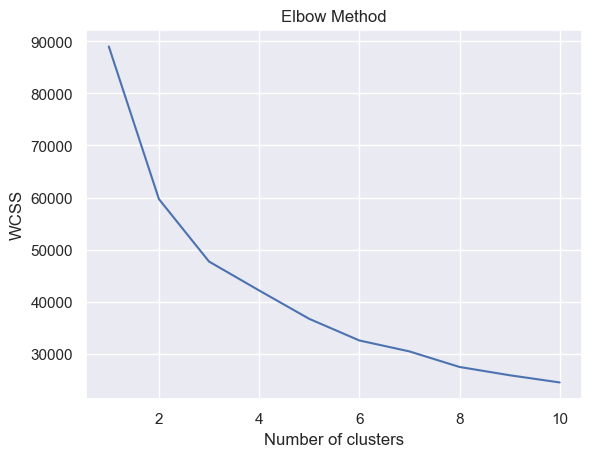

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


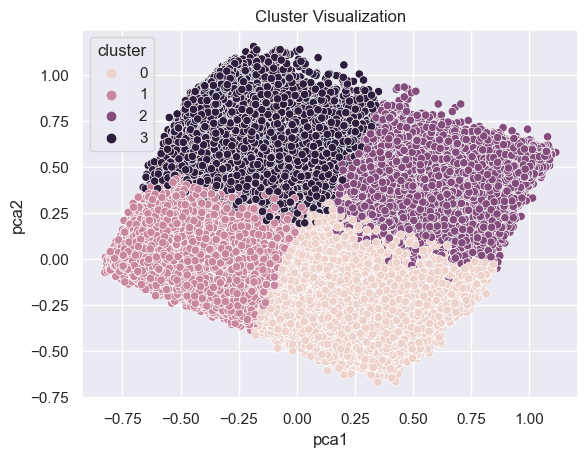

The average silhouette score is: 0.3028


In [7]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Reading the dataset
dataset = pd.read_csv("dataset.csv")

# Data Exploration
dataset.isnull().sum()

# Dropping irrelevant columns
df = dataset.drop(columns=['id', 'release_date', 'year'])

# Removing duplicates
df = df.drop_duplicates()

# Data transformation
datatypes = ['float64']
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.select_dtypes(include=datatypes))

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

# Choose the optimal number of clusters based on the Elbow graph
optimal_clusters = 6

# Applying KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(normalized_data)

# Visualizing the clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)
df['pca1'] = reduced_data[:, 0]
df['pca2'] = reduced_data[:, 1]

sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df)
plt.title('Cluster Visualization')
plt.show()

# Calculating silhouette score
silhouette_avg = silhouette_score(normalized_data, df['cluster'])
print(f"The average silhouette score is: {silhouette_avg:.4f}")


In [31]:
from sklearn_extra.cluster import KMedoids

# Sample the data (adjust the sample size as needed)
sample_size = 170726
sampled_data = normalized_data[np.random.choice(normalized_data.shape[0], sample_size, replace=False)]

wcss1 = []

for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, init='k-medoids++', random_state=42)
    kmedoids.fit(sampled_data)
    wcss1.append(kmedoids.inertia_)


MemoryError: Unable to allocate 217. GiB for an array with shape (170726, 170726) and data type float64

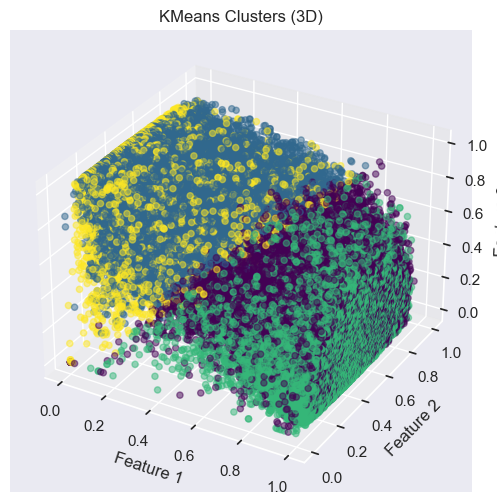

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three columns of the normalized data
ax.scatter(normalized_data[:, 0], normalized_data[:, 1], normalized_data[:, 2], c=df['cluster'], cmap='viridis', alpha=0.5)
ax.set_title('KMeans Clusters (3D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

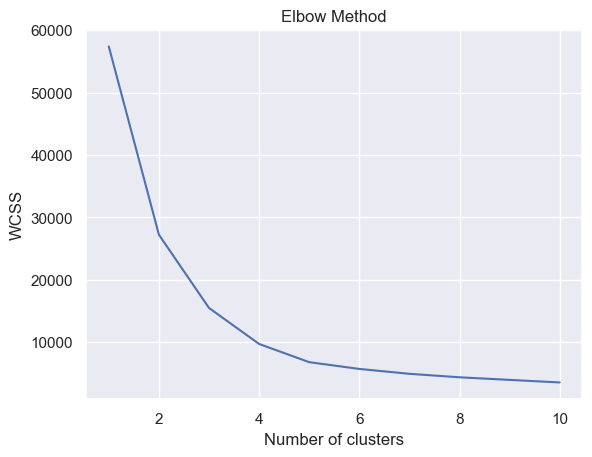

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 6 clusters: 0.17894498989686175


,artists,name,popularity
19862,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96
19976,['KAROL G'],BICHOTA,95
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94
19884,['Lil Nas X'],HOLIDAY,92
19880,"['Cardi B', 'Megan Thee Stallion']",WAP (feat. Megan Thee Stallion),92
76488,"['Myke Towers', 'Juhn']",Bandido,91
39236,"['Joel Corry', 'MNEK']",Head & Heart (feat. MNEK),91
19974,['BTS'],Life Goes On,91
39424,"['Manuel Turizo', 'Rauw Alejandro', 'Myke Towe...",La Nota,91
19874,"['Pop Smoke', 'Lil Baby', 'DaBaby']",For The Night (feat. Lil Baby & DaBaby),91


In [35]:
# importing the  libraries

import warnings  
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm





dataset = pd.read_csv("dataset.csv")

dataset

dataset.head()

dataset.tail()

dataset.describe()

dataset.info()

dataset.shape

## Data Exploration

dataset.isnull().sum()

dataset.columns

# Dropping irrelevant columns


df = dataset.drop(columns=['id', 'release_date', 'year'])
df

dataset.drop_duplicates()   #will drop the duplicate rows if it is present in the dataset.



## Data transformation




from sklearn.preprocessing import MinMaxScaler


datatypes = ['float64']
    
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.select_dtypes(include=datatypes))

pca = PCA(n_components=2, random_state=42)
normalized_data_pca = pca.fit_transform(normalized_data)

from sklearn.cluster import KMeans


# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(normalized_data_pca)
    wcss.append(kmeans.inertia_)


# Plotting the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()



## Applying KMeans clustering


from sklearn.cluster import KMeans



# Applying KMeans clustering with the chosen number of clusters

optimal_clusters = 6  # You can choose the number of clusters based on the elbow graph

kmeans = KMeans(n_clusters=optimal_clusters)

df['cluster'] = kmeans.fit_predict(normalized_data_pca)


# Calculate Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(normalized_data, df['cluster'])
print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}")


## Recommendation System based on KMeans clusters



class MusicRecommendationSystem:
    
    def __init__(self, dataset):
        
        self.dataset = dataset

    def recommend(self, song_name, amount=1):
        
        # Find the cluster of the given song
        song_cluster = self.dataset[self.dataset['name'].str.lower() == song_name.lower()]['cluster'].values[0]

        # Get songs from the same cluster
        cluster_songs = self.dataset[self.dataset['cluster'] == song_cluster]
        cluster_songs = cluster_songs[cluster_songs['name'].str.lower() != song_name.lower()]

        # Sort by popularity 
        recommendations = cluster_songs.sort_values('popularity', ascending=False).head(amount)

        # Display selected columns
        columns = ['artists', 'name', 'popularity']
        
        return recommendations[columns]


# Creating an instance of the recommendation system

recommendation_system = MusicRecommendationSystem(df)


recommendation_system.recommend("Lovers Rock", 10)











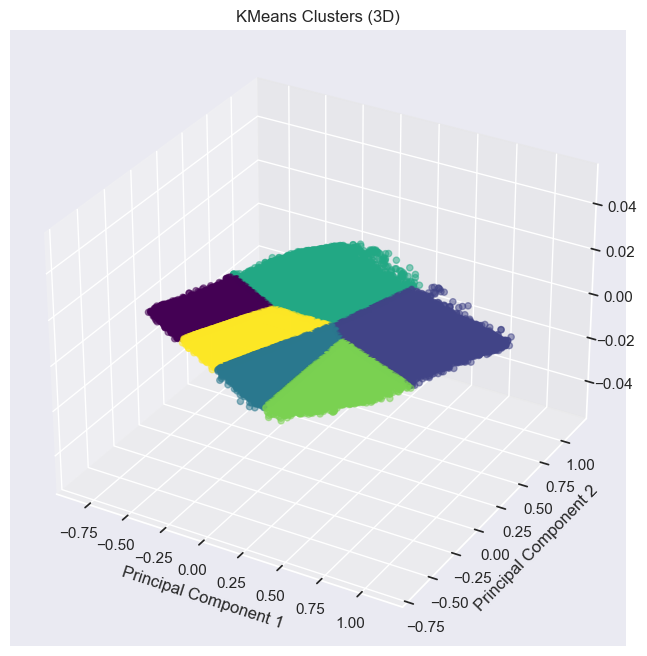

In [36]:
# 3D Scatter plot visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three columns of the normalized data
ax.scatter(normalized_data_pca[:, 0], normalized_data_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
ax.set_title('KMeans Clusters (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

plt.show()

Text(0.5, 1.0, 'Kmeans Clustering')

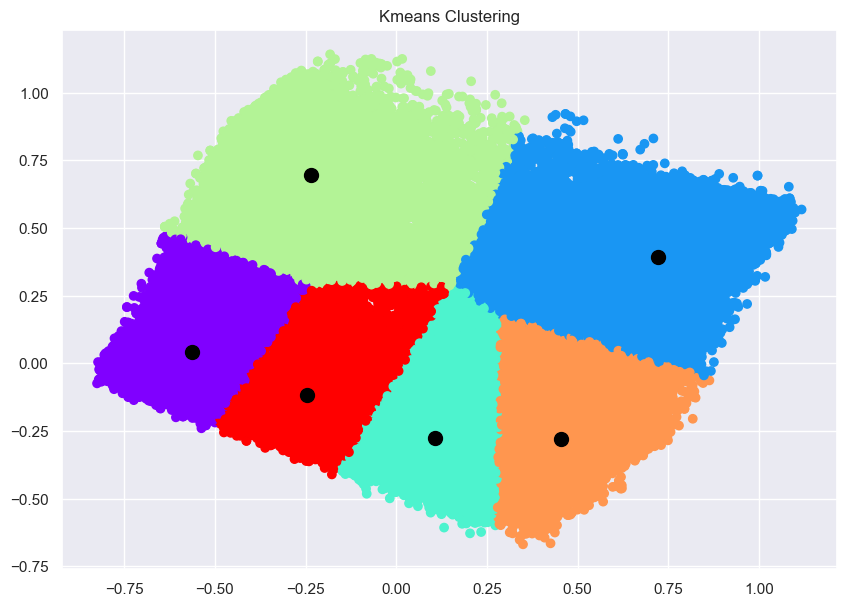

In [40]:
kmeans_labels = kmeans.labels_
kmeans_labels

plt.figure(figsize=(10, 7))
plt.scatter(normalized_data_pca[:, 0], normalized_data_pca[:, 1], c=kmeans_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroid')
plt.title('Kmeans Clustering')

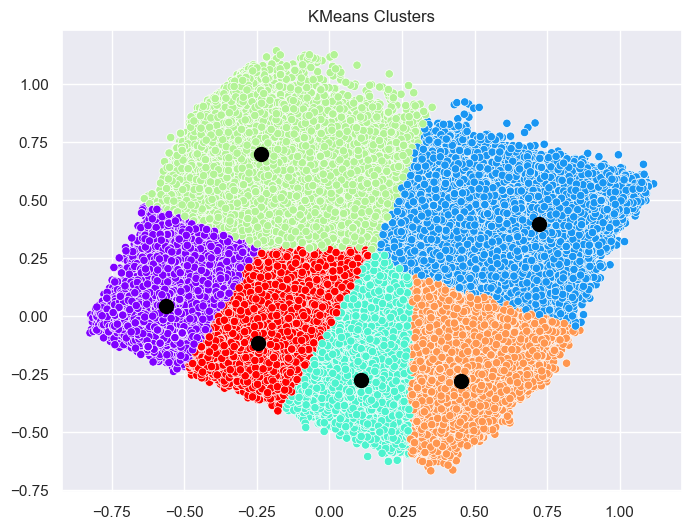

In [49]:
# Visualization of KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=normalized_data_pca[:, 0], y=normalized_data_pca[:, 1], c=kmeans_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroid')

plt.title('KMeans Clusters')

plt.show()